<a href="https://colab.research.google.com/github/jefffang19/cv_hw/blob/master/cvHW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
path = F"/content/gdrive/My Drive/iir_training_python/cvHW/cv.png"

In [6]:
img = cv2.imread(path)

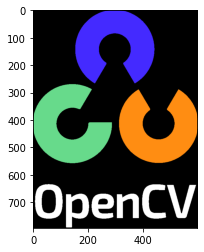

In [7]:
plt.imshow(img)

# Objective


```
cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
```



In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

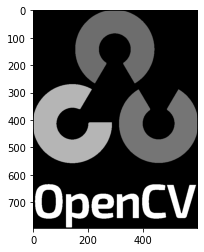

In [ ]:
plt.imshow(img_gray, cmap = 'gray')

# We implement above function ourself

In [ ]:
img.shape

(794, 600, 3)

# Get R, G, B channels

In [ ]:
imgR = img[..., 0] # R
imgG = img[..., 1] # G
imgB =img[..., 2] # B

In [ ]:
imgR.shape

(794, 600)

# transform to grayscale

In [ ]:
# elementwise multiply
img_gray = np.multiply(imgR,0.299) + np.multiply(imgG,0.587) + np.multiply(imgB,0.114)

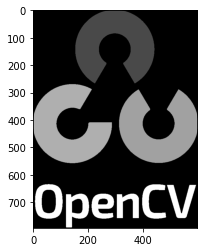

In [ ]:
plt.imshow(img_gray, cmap='gray')

# threshold function

# objective


```
cv2.threshold(x, low_bound, up_bound, cv2.THRESH_TOZERO)
```



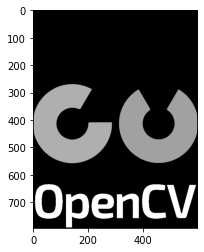

In [ ]:
ret,thresh1 = cv2.threshold(img_gray,127,255,cv2.THRESH_TOZERO)
plt.imshow(thresh1, cmap='gray')

# My Implementation

In [ ]:
path = F"/content/gdrive/My Drive/iir_training_python/cvHW/cv.png"

In [ ]:
def myThresh(in_img, lower_thresh, upper_thresh):
  if(0<=upper_thresh<=255 and 0<=lower_thresh<=255):
    up_th = np.less_equal(in_img, upper_thresh)
    low_th = np.greater(in_img, lower_thresh)
    return np.multiply(np.multiply(in_img,low_th), up_th)
  else:
    print('wrong value')

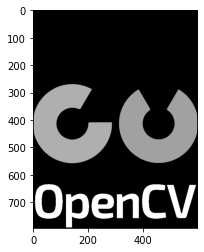

In [ ]:
result = myThresh(img_gray, 127, 255)

plt.imshow(result, cmap='gray')

In [ ]:
myThresh(img, 127, 278)

wrong value


# Segmentation Model

In [8]:
!pip install -U segmentation-models

Requirement already up-to-date: segmentation-models in /usr/local/lib/python3.6/dist-packages (1.0.1)


In [9]:
!pip install tensorflow-gpu==1.15.0

In [10]:
import tensorflow as tf

In [11]:
tf.__version__

'1.15.0'

In [12]:
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


# Set Model backbone

In [13]:
model = sm.Unet(backbone_name='vgg16', encoder_weights='imagenet')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, None, None, 6 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, None, None, 6 0           block1_conv2[0][0]               
______________________________________________________________________________________________

# Test Fit Model

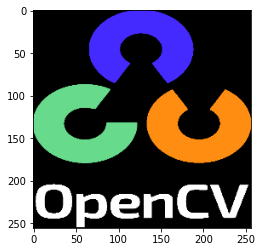

In [ ]:
# image size according to the decoder filter of the model -> (256,128,64,32,16)
x = cv2.resize(img, (256,256))
plt.imshow(x)

In [ ]:
# increase dimmension for batch_size
x = x[np.newaxis, :]
x.shape

(1, 256, 256, 3)

In [ ]:
predict_img = model.predict(x)

In [ ]:
p = predict_img.reshape((256,256))

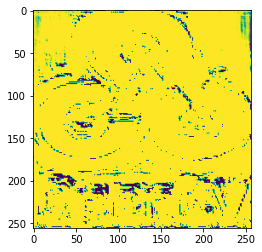

In [ ]:
plt.imshow(p)

In [ ]:
predict_img.shape

(1, 256, 256, 1)

In [ ]:
#overlap the predict img and the origin img
result = predict_img[0] + x[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


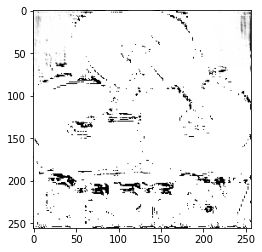

In [ ]:
plt.imshow(result)

In [15]:
import glob

In [16]:
!ls "/content/gdrive/My Drive/iir_training_python/cvHW/f01"

image  label  train_image  train_mask


# Import Training Data

In [17]:
filenames = glob.glob(F"/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/*.png")

In [18]:
filenames.sort()
filenames

['/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0001.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0002.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0003.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0004.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0005.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0006.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0007.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0008.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0009.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0010.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0011.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0012.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/image/0013.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW

In [19]:
images = [cv2.imread(i) for i in filenames]

In [20]:
# normalize
images = [i/255 for i in images] 

In [21]:
#resize to fit model
images = [cv2.resize(i, (480,1152)) for i in images]

In [22]:
images[0].shape

(1152, 480, 3)

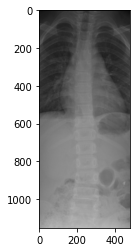

In [23]:
plt.imshow(images[0])

# Import training Labels

In [24]:
filenames = glob.glob(F"/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/*.png")

In [25]:
filenames.sort()
filenames

['/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0001.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0002.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0003.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0004.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0005.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0006.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0007.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0008.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0009.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0010.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0011.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0012.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW/f01/label/0013.png',
 '/content/gdrive/My Drive/iir_training_python/cvHW

In [26]:
labels = [cv2.imread(i) for i in filenames]

In [27]:
labels = [i/255 for i in labels]

In [28]:
labels = [cv2.resize(i,(480,1152)) for i in labels]

In [29]:
len(labels)

20

In [30]:
labels[0].shape

(1152, 480, 3)

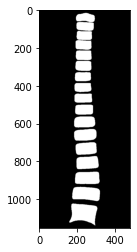

In [31]:
plt.imshow(labels[0])

# Split Training and Testing

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
index_train, index_test = train_test_split(range(20),test_size=0.2, shuffle=True)

In [58]:
index_train

[19, 6, 2, 7, 3, 12, 0, 13, 9, 1, 15, 17, 5, 16, 14, 8]

In [59]:
index_test

[11, 10, 4, 18]

In [60]:
# divide the imgs and labels
x_train = [images[i] for i in index_train]
x_test = [images[i] for i in index_test]
y_train = [labels[i] for i in index_train]
y_test = [labels[i] for i in index_test]

In [61]:
# convert fit data into type numpy
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [62]:
y_test.shape

(4, 1152, 480, 3)

# save the reshaped training images and masks

In [ ]:
for i in range(len(x_train)):
  path = "/content/gdrive/My Drive/iir_training_python/cvHW/f01/train_image/class0/{:04d}.png".format(i)
  cv2.imwrite(path, x_train[i])
  path = "/content/gdrive/My Drive/iir_training_python/cvHW/f01/train_mask/class0/{:04d}.png".format(i)
  cv2.imwrite(path, y_train[i])

# data augmentation  (TBD)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

The structure of the filepath generator need to be



```
main_directory/
...class_a/
......a_image_1.jpg
......a_image_2.jpg
...class_b/
......b_image_1.jpg
......b_image_2.jpg
```



In [ ]:
# we need to create 2 augmentation generator, and they must take same augument
data_gen_args = dict(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

image_aug_gen = ImageDataGenerator(**data_gen_args)
label_aug_gen = ImageDataGenerator(**data_gen_args)

In [ ]:
# fit the data Augmentation
image_aug_gen.fit(x_train)
label_aug_gen.fit(y_train)

In [ ]:
# provide same seed
seed = 1

image_generator = image_aug_gen.flow_from_directory(
    '/content/gdrive/My Drive/iir_training_python/cvHW/f01/train_image',
    target_size=(1152,480),
    batch_size=4,
    class_mode=None,
    seed=seed,
    subset='training')
valid_image_generator = image_aug_gen.flow_from_directory(
    '/content/gdrive/My Drive/iir_training_python/cvHW/f01/train_image',
    target_size=(1152,480),
    batch_size=4,
    class_mode=None,
    seed=seed,
    subset='validation')
mask_generator = label_aug_gen.flow_from_directory(
    '/content/gdrive/My Drive/iir_training_python/cvHW/f01/train_mask',
    target_size=(1152,480),
    batch_size=4,
    class_mode=None,
    seed=seed,
    subset='training')
valid_mask_generator = label_aug_gen.flow_from_directory(
    '/content/gdrive/My Drive/iir_training_python/cvHW/f01/train_mask',
    target_size=(1152,480),
    batch_size=4,
    class_mode=None,
    seed=seed,
    subset='validation')

Found 12 images belonging to 1 classes.
Found 4 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 4 images belonging to 1 classes.


In [ ]:
im = []
la = []
for i in range(5):
  ibatch = image_generator.next()
  vbatch = mask_generator.next()
  if(i==4):
    im = ibatch[3]
    la = vbatch[3]
    break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


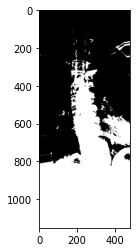

In [ ]:
plt.imshow(im)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


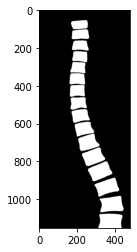

In [ ]:
plt.imshow(la)

In [ ]:
def combine_generator(gen1, gen2):
    while True:
        yield(next(gen1), next(gen2))
#combine
train_aug_gen = combine_generator(image_generator, mask_generator)
valid_aug_gen = combine_generator(valid_image_generator, valid_mask_generator)

# Fit model

In [63]:
# model save path
my_model_fit_callback = [
  tf.keras.callbacks.ModelCheckpoint(filepath='/content/gdrive/My Drive/iir_training_python/cvHW/weights/model.{epoch:02d}-{val_loss:.2f}.h5', save_best_only=True),
]

In [64]:
model = sm.Unet(backbone_name='vgg16', encoder_weights='imagenet')

In [65]:
model.compile(
    'Adam',
    loss=sm.losses.bce_jaccard_loss,
    metrics=[sm.metrics.iou_score],
)

In [ ]:
model.fit_generator(
    train_aug_gen,
    steps_per_epoch=3,
    epochs=50,
    callbacks=my_model_fit_callback,
    validation_data = valid_aug_gen,
    validation_steps=1)

In [66]:
model.fit(x=x_train, y=y_train, batch_size=4, epochs=120, validation_split=0.2, callbacks=my_model_fit_callback)

Train on 12 samples, validate on 4 samples
Epoch 1/120
12/12 [==============================] - 19s 2s/sample - loss: 1.5615 - iou_score: 0.1574 - val_loss: 2.0877 - val_iou_score: 0.0020
Epoch 2/120
12/12 [==============================] - 10s 797ms/sample - loss: 1.4131 - iou_score: 0.1857 - val_loss: 14.8837 - val_iou_score: 2.8513e-11
Epoch 3/120
12/12 [==============================] - 10s 793ms/sample - loss: 1.3122 - iou_score: 0.2145 - val_loss: 39.8612 - val_iou_score: 0.1565
Epoch 4/120
12/12 [==============================] - 10s 794ms/sample - loss: 1.2121 - iou_score: 0.2406 - val_loss: 51.3237 - val_iou_score: 0.1563
Epoch 5/120
12/12 [==============================] - 9s 787ms/sample - loss: 1.1525 - iou_score: 0.2587 - val_loss: 14.7137 - val_iou_score: 0.0088
Epoch 6/120
12/12 [==============================] - 9s 781ms/sample - loss: 1.0906 - iou_score: 0.2880 - val_loss: 12.9029 - val_iou_score: 2.7133e-11
Epoch 7/120
12/12 [==============================] - 9s 786ms

# Caculate IoU

In [67]:
model.evaluate(x=x_test, y=y_test)

4/4 [==============================] - 1s 278ms/sample - loss: 0.5818 - iou_score: 0.6245


[0.5817582607269287, 0.6244967]

In [68]:
for i in range(len(x_test)):
  print(model.evaluate(x=x_test[i][np.newaxis, :], y=y_test[i][np.newaxis, :]))

1/1 [==============================] - 0s 258ms/sample - loss: 0.5015 - iou_score: 0.6566
[0.5014821887016296, 0.6565932]
1/1 [==============================] - 0s 256ms/sample - loss: 0.6034 - iou_score: 0.6215
[0.6034108400344849, 0.62146443]
1/1 [==============================] - 0s 260ms/sample - loss: 0.4977 - iou_score: 0.6695
[0.49771350622177124, 0.6695315]
1/1 [==============================] - 0s 261ms/sample - loss: 0.7144 - iou_score: 0.5605
[0.7143541574478149, 0.5604701]


#Test Predict

In [69]:
test_img = x_test[0][np.newaxis, :]

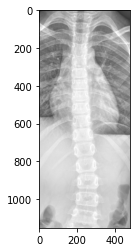

In [70]:
plt.imshow(test_img[0])

In [71]:
predict_img = model.predict(test_img)

In [72]:
p = predict_img.reshape((1152,480))

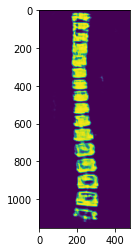

In [73]:
plt.imshow(p)

In [48]:
p = cv2.cvtColor(p, cv2.COLOR_GRAY2RGB)
p.shape

(1152, 480, 3)

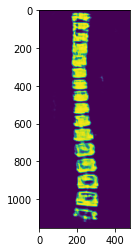

In [74]:
plt.imshow(p)

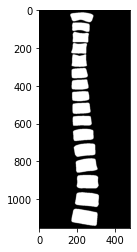

In [75]:
plt.imshow(y_test[0])

In [ ]:
show_img = predict_img[0] + test_img[0]

In [ ]:
show_img.shape

(960, 480, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


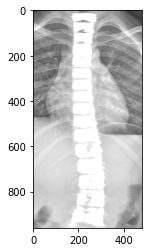

In [ ]:
plt.imshow(show_img)

# Testing Datas

In [76]:
test_images_names = glob.glob(F"/content/gdrive/My Drive/iir_training_python/cvHW/f03/image/*.png")
test_labels_names = glob.glob(F"/content/gdrive/My Drive/iir_training_python/cvHW/f03/label/*.png")

In [77]:
test_labels_names.sort()
test_images_names.sort()

In [78]:
images = [cv2.imread(i) for i in test_images_names]
images = [i/255 for i in images] 
images = [cv2.resize(i, (480,1152)) for i in images]

In [79]:
labels = [cv2.imread(i) for i in test_labels_names]
labels = [i/255 for i in labels] 
labels = [cv2.resize(i, (480,1152)) for i in labels]

# evaluate testing iou

In [97]:
for i in range(len(images)):
  print('image {}:'.format(i))
  model.evaluate(np.array(images[i])[np.newaxis,:], np.array(labels[i])[np.newaxis,:])

image 0:
1/1 [==============================] - 0s 326ms/sample - loss: 0.8858 - iou_score: 0.4767
image 1:
1/1 [==============================] - 0s 277ms/sample - loss: 1.9595 - iou_score: 0.0514
image 2:
1/1 [==============================] - 0s 256ms/sample - loss: 0.8768 - iou_score: 0.4564
image 3:
1/1 [==============================] - 0s 257ms/sample - loss: 1.2894 - iou_score: 0.2289
image 4:
1/1 [==============================] - 0s 259ms/sample - loss: 0.8990 - iou_score: 0.4137
image 5:
1/1 [==============================] - 0s 256ms/sample - loss: 1.1699 - iou_score: 0.3171
image 6:
1/1 [==============================] - 0s 251ms/sample - loss: 1.2962 - iou_score: 0.2597
image 7:
1/1 [==============================] - 0s 257ms/sample - loss: 1.2756 - iou_score: 0.2560
image 8:
1/1 [==============================] - 0s 264ms/sample - loss: 1.5521 - iou_score: 0.1720
image 9:
1/1 [==============================] - 0s 259ms/sample - loss: 0.5522 - iou_score: 0.6360
image 10:


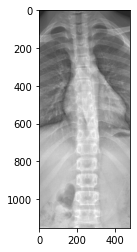

In [98]:
plt.imshow(images[9])

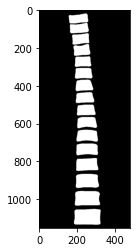

In [99]:
plt.imshow(labels[9])

In [100]:
test_img = images[9][np.newaxis, :]

In [101]:
r = model.predict(test_img)

In [102]:
r.shape

(1, 1152, 480, 1)

In [103]:
p = r.reshape((1152,480))

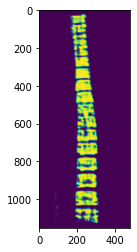

In [104]:
plt.imshow(p)

# Convert img from float to uint8

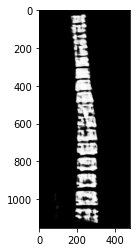

In [105]:
i = p*255 #convert image from float(0~1) to int(0~255)
i = i.astype(np.uint8)
i = cv2.cvtColor(i,cv2.COLOR_GRAY2RGB)

plt.imshow(i)

# WaterShed

In [ ]:
meanshif = cv2.pyrMeanShiftFiltering(i, 21, 51)
gray = cv2.cvtColor(meanshif, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

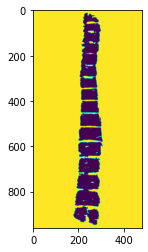

In [ ]:
plt.imshow(thresh)

In [ ]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 1)

_erode = cv2.erode(opening, kernel, iterations = 3)
sure_bg = cv2.dilate(opening, kernel, iterations = 3)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.001 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

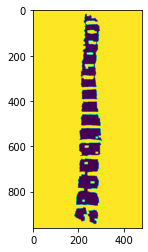

In [ ]:
plt.imshow(sure_bg)

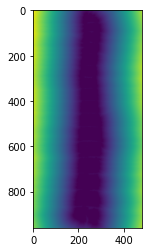

In [ ]:
plt.imshow(dist_transform)

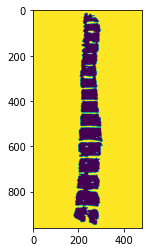

In [ ]:
plt.imshow(sure_fg)

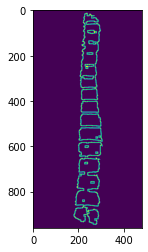

In [ ]:
plt.imshow(unknown)

In [ ]:
ret, markers = cv2.connectedComponents(sure_fg)
print(np.unique(markers))
markers = markers+1
print(np.unique(markers))

markers[unknown==255] = 0

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


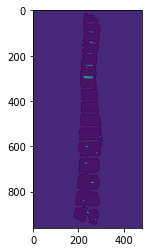

In [ ]:
plt.imshow(markers)

In [ ]:
markers = cv2.watershed(i,markers)
i[markers == -1] = [256,0,0]

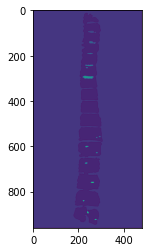

In [ ]:
plt.imshow(markers)

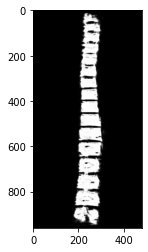

In [ ]:
plt.imshow(i)

In [ ]:
np.unique(markers)

array([-1,  1,  2,  3], dtype=int32)

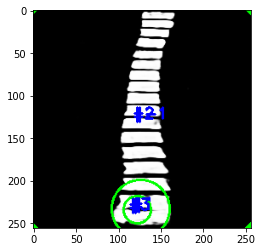

In [ ]:
import imutils
for label in np.unique(markers):
	# 如果該標籤爲0，則表示其爲背景，直接忽略
	if label == 0:
		continue

	# 爲標籤區域分配內存並將在mask上繪製結果
	mask = np.zeros(gray.shape, dtype="uint8")
	mask[markers == label] = 255

	# 在mask上檢測輪廓並獲得最大的一個輪廓
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)

	# 畫一個圈把物體圍起來
	((x, y), r) = cv2.minEnclosingCircle(c)
	cv2.circle(i, (int(x), int(y)), int(r), (0, 255, 0), 2)
	cv2.putText(i, "#{}".format(label), (int(x) - 10, int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
plt.imshow(i)